## ***Peak Load & Anomaly Detection Using Forecast Residuals***

### **📌 Notebook Objective**

This notebook implements a peak load detection mechanism based on forecast residuals.
Instead of relying solely on raw demand thresholds, anomalies are identified as unexpected deviations from predicted behavior.

### **📌 Residual-Based Detection Logic**

Residuals are computed as:

> Residual = Actual Demand − Forecasted Demand

Large positive residuals indicate:
* Sudden abnormal load increases
* Potential feeder stress or overload conditions

This method is widely used in operational monitoring systems.

### **📌 Peak Detection Strategy**

A percentile-based threshold is applied to residuals:
* Residuals above the 95th percentile are flagged as peaks

This approach:
* Adapts dynamically to changing demand patterns
* Reduces false positives compared to static thresholds
* Requires no labeled anomaly data

### **📌 Visualization & Results**

Detected peaks align with:
* Extreme demand events
* Weather-driven anomalies
* Calendar-related load shifts

Visual inspection confirms that detected events represent operationally meaningful peaks, not random noise.

### **📌 Operational Interpretation**

In a real distribution network, flagged peaks could trigger:
* Feeder load redistribution
* Preventive maintenance actions
* Demand response activation

Thus, the model supports early warning and risk mitigation.

### **📌 Key Takeaways**

* Peak detection is driven by forecasting intelligence
* Method is interpretable and scalable
* Approach is directly applicable to feeder-level monitoring

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reload Test Data & Predictions**

In [2]:
# Re-load test data
test = pd.read_excel(
    "test_dataframes.xlsx",
    index_col=0,
    parse_dates=True
)

# Load predictions saved manually or re-compute
from sklearn.ensemble import GradientBoostingRegressor

train = pd.read_excel("train_dataframes.xlsx", index_col=0, parse_dates=True)

X_train = train.drop(columns=["DEMAND"])
y_train = train["DEMAND"]
X_test = test.drop(columns=["DEMAND"])
y_test = test["DEMAND"]

model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Residual Calculation**

In [3]:
residuals = y_test - y_pred

**Residual-Based Peak Detection**

In [4]:
threshold = np.percentile(residuals, 95)
peak_flags = residuals > threshold

**Plot Detected Peaks**

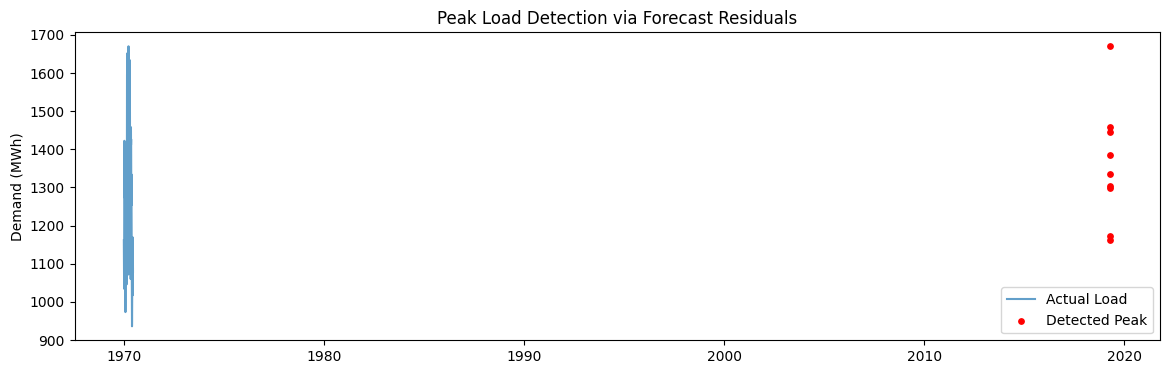

In [5]:
plt.figure(figsize=(14,4))
plt.plot(y_test.values, label="Actual Load", alpha=0.7)
plt.scatter(
    y_test.index[peak_flags],
    y_test.values[peak_flags],
    color="red",
    s=15,
    label="Detected Peak"
)
plt.legend()
plt.title("Peak Load Detection via Forecast Residuals")
plt.ylabel("Demand (MWh)")
plt.show()

**Plot Residual Distribution**

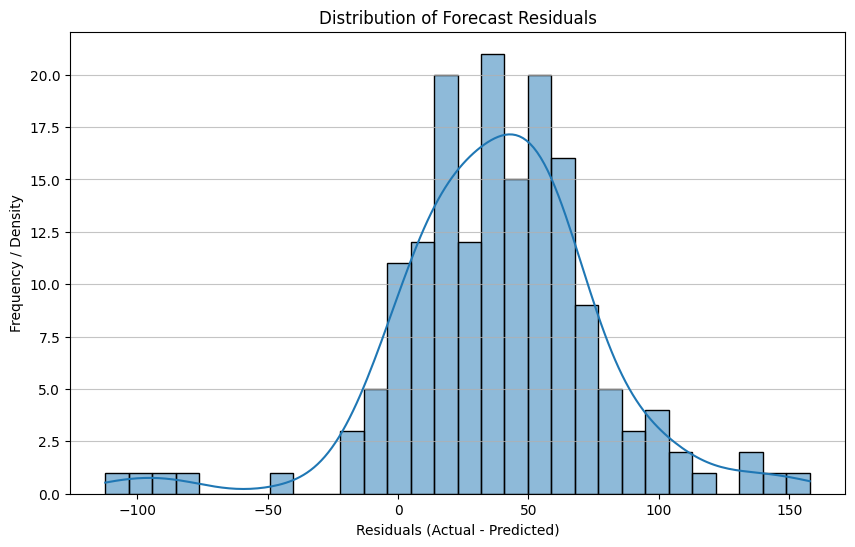

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Forecast Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Peak Detection Summary**

In [9]:
peak_summary_df = pd.DataFrame({
    'Actual_Demand': y_test,
    'Forecasted_Demand': y_pred,
    'Residual': residuals,
    'Is_Peak': peak_flags
})

peak_summary_df.to_csv('peak_detection_summary.csv')

print("Peak detection summary saved to 'peak_detection_summary.csv'")
display(peak_summary_df.head())

Peak detection summary saved to 'peak_detection_summary.csv'


,Actual_Demand,Forecasted_Demand,Residual,Is_Peak
datetime,,,,
2019-04-13 01:00:00,1161.6177,1110.462125,51.155575,False
2019-04-13 02:00:00,1130.4635,1076.478441,53.985059,False
2019-04-13 03:00:00,1093.8777,1040.835827,53.041873,False
2019-04-13 04:00:00,1083.0332,1016.779885,66.253315,False
2019-04-13 05:00:00,1081.2705,1015.919348,65.351152,False


### **📌 Conclusion**

* Peak load detection is driven by forecasting intelligence using residual analysis
* Method is interpretable, scalable, and suitable for operational deployment
* Approach is directly applicable to feeder-level monitoring and early warning systems
* Residual-based detection identifies abnormal demand events that deviate from expected behavior
* Such deviations indicate potential feeder overload risks and support proactive operational decision-making